# <center> Home assignment 3 </center>
## <center> Student: Gleb Filatov </center>

## Task 1

In [1]:
%matplotlib inline
import networkx as nx
import seaborn as sns
import scipy.io
from os import listdir
from os.path import isfile, join


In [2]:
#process sparse matrix
data = scipy.io.loadmat('flickr.mat')
names = data['names']
matrix = data['A'].tocoo()
edges = [edge for edge in zip(matrix.row,matrix.col)]

G = nx.DiGraph()
G.add_nodes_from(range(len(names)))
G.add_edges_from(edges)

After doing processing of data, let's compute required statistics. First - degree centrality

In [3]:
cen = nx.centrality.degree_centrality(G)
c = sorted(cen.items(), key = lambda x: x[1], reverse = True)
top50cen = [names[i[0]].rstrip() for i in c[:50]]
print(top50cen)

['awfulsara', 'drp', 'DrJoanne', 'antimethod', '*Ivan*', 'BombDog', 'deborah lattimore', 'Simon Pais', 'cymagen', 'notraces', 'MaD GiÂ®Lâ\x80¢â\x84¢', 'aleyna', '*starlet*', 'lorrainemd', 'Pandarine', 'artofgold', ':Nikola', 'Mareen Fischinger', 'gu@va', 'Mylens', 'bernardo.borghetti', 'hot_luscious', 'romanlily', 'jkottke', 'pixietart', 'slowernet', 'anildash', 'pbowers', 'Joi', 'fraying', 'naftalina007', '.lush', 'Loobylu', 'Buntekuh', 'CherryVega', 'Gayla', 'jakedobkin', 'underbunny', 'fd', 'Airchild', 'maximolly', '* HoNe$t *', 'Sexy Swedish Babe', 'Ya Ya', 'kaneblues', 'Tsunami Notes', '990000', 'overshadowed', 'Tom Coates', 'good morning stradivari']


Second - PageRank scores

In [4]:
pr = nx.pagerank(G)
s = sorted(pr.items(), key = lambda x: x[1], reverse = True)
top50pr = [names[i[0]].rstrip() for i in s[:50]]
print(top50pr)

['awfulsara', 'drp', 'antimethod', 'BombDog', '*Ivan*', 'MaD GiÂ®Lâ\x80¢â\x84¢', 'DrJoanne', 'Simon Pais', 'deborah lattimore', 'cymagen', ':Nikola', 'notraces', 'jkottke', 'lorrainemd', 'slowernet', 'artofgold', 'romanlily', '*starlet*', 'Pandarine', 'hot_luscious', 'Mareen Fischinger', 'underbunny', 'fraying', 'Mylens', 'aleyna', '* HoNe$t *', 'gu@va', 'pbowers', 'anildash', 'Loobylu', 'Joi', 'CherryVega', 'Marcelo  Montecino', 'bernardo.borghetti', '!!uAe prince!!', 'Esther_G', 'Departure Lounge', 'gruntzooki', 'Gayla', 'Tom Coates', 'maximolly', 'chromogenic', 'Agridulce', 'naftalina007', 'pixietart', 'aquanerds', 'overshadowed', '.lush', 'jakedobkin', 'fd']


Last - Hubs and Authorities score. We'll provide names for each of the scores separatley

In [6]:
(h,a) = nx.hits(G)
hubs = sorted(h.items(), key = lambda x: x[1], reverse = True)
auth = sorted(a.items(), key = lambda x: x[1], reverse = True)
top50h = [names[i[0]].rstrip() for i in hubs[:50]]
top50a = [names[i[0]].rstrip() for i in auth[:50]]
print('Hubs score\n', top50h)

Hubs score
 ['mrpiink', 'automat', 'schizoo23', 'lorrainemd', 'sgoralnick', '*starlet*', 'brynfoto', 'liquid pixel', 'noahstone', 'isherwood', 'Arno-MM', 'scotsman0170', 'WaveSpire', 'tozzer', '...cathzilla', 'cymagen', 'ola_babe1', 'DrJoanne', 'pablokorona', 'demouser', 'jallive', 'macebio', 'marika b', 'drp', 'Osvaldo', 'Crea.tive', 'sheldonschwartz', 'virgu', 'mehmetkale', 'gucci1000', 'Zewalt', 'bernardo.borghetti', 'notraces', 'Grains And Light', 'overshadowed', 'neuskool', 'pblgbp', 'sillydog', 'zaharoula', 'mark daniel', 'astrid~', 'MrTopf', 'spanier', 'ricd', 'schani', 'redmondbarry', 'Mareen Fischinger', 'grow-er', '.lush', 'naftalina007']


In [7]:
print('Authorities score\n', top50a)

Authorities score
 ['awfulsara', 'drp', 'DrJoanne', '*Ivan*', 'antimethod', 'BombDog', 'Simon Pais', 'deborah lattimore', 'cymagen', ':Nikola', 'lorrainemd', '*starlet*', 'aleyna', 'artofgold', 'notraces', 'romanlily', 'Pandarine', 'Mylens', 'Mareen Fischinger', 'bernardo.borghetti', 'gu@va', 'Sexy Swedish Babe', 'pbowers', '.lush', 'Merina', 'Esther_G', 'slowernet', 'CherryVega', 'bex_ai', 'nedrosen', 'naftalina007', 'Agridulce', 'callipygian', 'isherwood', 'aircrash', 'Lola The Car Chick', 'liliths_nymph', 'Solarman', 'Ryou in the box', 'pixietart', 'Rachael D', 'fd', 'macwagen', 'underbunny', '* HoNe$t *', 'kunja', 'Home alone', 'bekon', 'tecgirl', 'carf']


To sum up, let's find names, present in all ranking algorithms


In [8]:
common = set.intersection(set(top50cen),set(top50a),set(top50h),set(top50pr))
common

{'*starlet*',
 '.lush',
 'DrJoanne',
 'Mareen Fischinger',
 'bernardo.borghetti',
 'cymagen',
 'drp',
 'lorrainemd',
 'naftalina007',
 'notraces'}

## Task 2

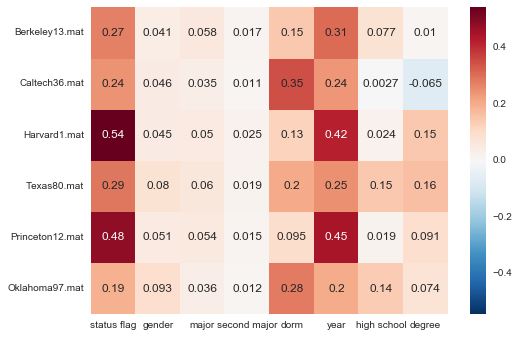

In [11]:
files = [f for f in listdir('''D:\\DS mag\\Network Analysis\\HW3\\universities''') if 
         isfile(join('D:\\DS mag\\Network Analysis\\HW3\\universities', f))]
attr_names = ['status flag', 'gender', 'major', 'second major', 'dorm', 'year', 'high school']
assort = {}
for file in files:
    uni = scipy.io.loadmat('universities\\'+file)
    node_attr = uni['local_info']
    mat = uni['A'].tocoo()
    edges_uni = [edge for edge in zip(mat.row,mat.col)]

    G_uni = nx.DiGraph()
    G_uni.add_nodes_from(range(len(node_attr)))
    G_uni.add_edges_from(edges_uni)

    #add node attributes
    uni_assort = []    
    for i,name in zip(range(len(node_attr[0])), attr_names):
        attr_dict = {node:value for node,value in zip(G_uni.nodes(),node_attr[:,i] )}
        nx.set_node_attributes(G_uni,name,attr_dict)
        uni_assort.append(nx.attribute_assortativity_coefficient(G_uni,name))
    uni_assort.append(nx.degree_assortativity_coefficient(G_uni))
    assort[file]=uni_assort

sns.heatmap(list(assort.values()),xticklabels=attr_names+['degree'], yticklabels=list(assort.keys()), annot = True)

Highest observed assortativity is by status flag calculated at Harvard: 0.54. Least assortative attributes are gender, and both majors for all universities. Next we can notice some interesting properties: for example, high school of a student plays some role (pretty minor though) in Texas and Oklahoma universities, but is almost completly irrelevant at Caltech, Harvard and Princeton. Also dorm is somewhat important for creating friendship ties at Caltech and Oklahoma universitises as opposed to Princeton.